In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\aadis\Desktop\Belgium Air Pollution\data.csv', delimiter=';')
df = df.drop(['Country', 'Country Code', 'Source Name', 'Unit'], axis=1) # Drop unnecessary columns

# Update column names:
df.columns = ['City', 'Location', 'Coordinates', 'Pollutant', 'Value', 'Last Updated']

print(df)

                City                                   Location  \
0           Flanders  Belgium - Flanders - 40AB02 - BERENDRECHT   
1           Brussels        Belgium - Brussels - 41R012 - UCCLE   
2           Flanders       Belgium - Flanders - 42N046 - GELLIK   
3           Flanders    Belgium - Flanders - 42R897 - ANTWERPEN   
4           Wallonia        Belgium - Wallonia - 43H201 - LIEGE   
..               ...                                        ...   
610       Luxembourg             Belgium - Luxembourg - BETN132   
611  Oost-Vlaanderen        Belgium - Oost-Vlaanderen - BETR701   
612        Antwerpen              Belgium - Antwerpen - BETR801   
613        Antwerpen              Belgium - Antwerpen - BETR831   
614        Antwerpen              Belgium - Antwerpen - BETR893   

             Coordinates Pollutant  Value               Last Updated  
0     51.34073,4.3218203      PM10   39.2  2017-03-13T13:00:00+01:00  
1     50.79663,4.3585386       SO2    2.0  2017-07-21

In [3]:
df['Coordinates'] = df['Coordinates'].str.split(',')

# Extract latitude and longitude values into separate columns
df['Latitude'] = df['Coordinates'].apply(lambda x: x[0])
df['Longitude'] = df['Coordinates'].apply(lambda x: x[1])

# Convert the latitude and longitude columns to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

df.head()

,City,Location,Coordinates,Pollutant,Value,Last Updated,Latitude,Longitude
0,Flanders,Belgium - Flanders - 40AB02 - BERENDRECHT,"[51.34073, 4.3218203]",PM10,39.2,2017-03-13T13:00:00+01:00,51.340730,4.321820
1,Brussels,Belgium - Brussels - 41R012 - UCCLE,"[50.79663, 4.3585386]",SO2,2.0,2017-07-21T00:00:00+02:00,50.796630,4.358539
2,Flanders,Belgium - Flanders - 42N046 - GELLIK,"[50.882298, 5.618874]",NO2,5.0,2017-07-21T00:00:00+02:00,50.882298,5.618874
3,Flanders,Belgium - Flanders - 42R897 - ANTWERPEN,"[51.250107, 4.3421044]",SO2,0.0,2017-07-21T00:00:00+02:00,51.250107,4.342104
4,Wallonia,Belgium - Wallonia - 43H201 - LIEGE,"[50.624992, 5.5474644]",SO2,0.5,2016-12-21T14:00:00+01:00,50.624992,5.547464


In [4]:
df['Date'] = pd.to_datetime(df['Last Updated'], format='%Y-%m-%d')
df['Year'] = list(map(lambda x: int(x.year), df.Date))

In [5]:
df.describe(include='all')

,City,Location,Coordinates,Pollutant,Value,Last Updated,Latitude,Longitude,Date,Year
count,615,615,615,615,615.000000,615,615.000000,615.000000,615,615.000000
unique,14,198,119,6,NaN,30,NaN,NaN,30,NaN
top,Flanders,Belgium - Oost-Vlaanderen - BETR701,"[50.88356, 4.382963]",NO2,NaN,2017-07-21T00:00:00+02:00,NaN,NaN,2017-07-21 00:00:00+02:00,NaN
freq,175,6,12,167,NaN,281,NaN,NaN,281,NaN
mean,NaN,NaN,NaN,NaN,13.297405,NaN,50.843490,4.497798,NaN,2018.453659
std,NaN,NaN,NaN,NaN,15.562551,NaN,0.372692,0.730406,NaN,1.496156
min,NaN,NaN,NaN,NaN,0.000000,NaN,49.719280,2.582323,NaN,2016.000000
25%,NaN,NaN,NaN,NaN,3.203750,NaN,50.616720,4.278890,NaN,2017.000000
50%,NaN,NaN,NaN,NaN,7.500000,NaN,50.895100,4.421559,NaN,2017.000000
75%,NaN,NaN,NaN,NaN,15.000000,NaN,51.170300,5.013205,NaN,2020.000000


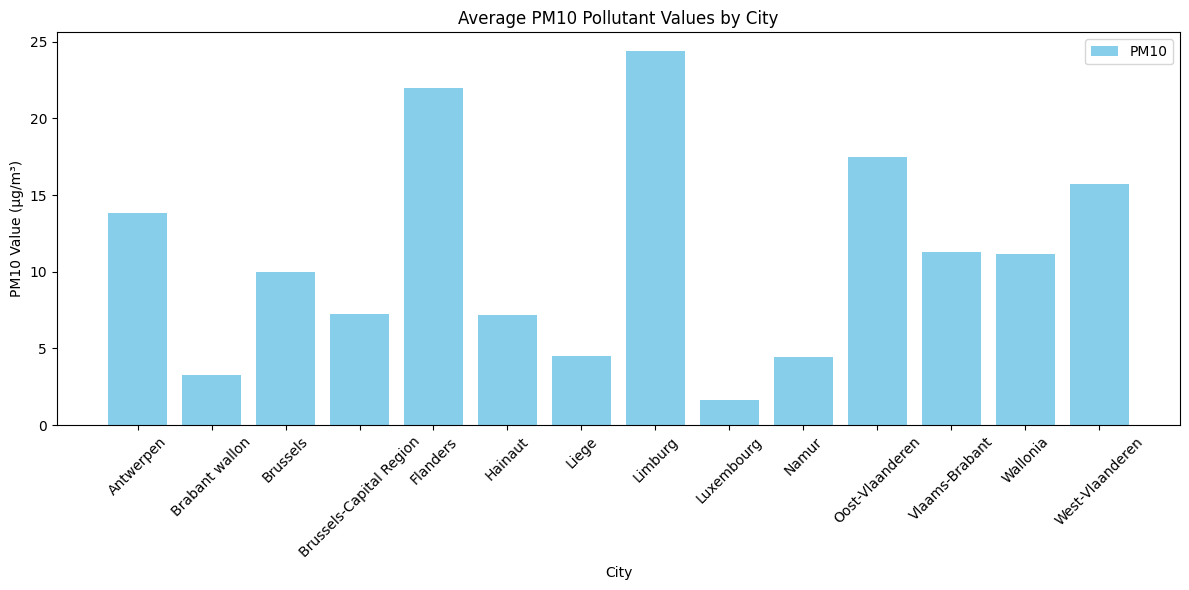

In [6]:
# Filter for PM10 pollutants
pm_df = df[df['Pollutant'] == 'PM10']

# Group by 'City' and aggregate mean values
pm_means = pm_df.groupby('City')['Value'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(pm_means['City'], pm_means['Value'], color='skyblue', label = 'PM10')
plt.xlabel('City')
plt.ylabel('PM10 Value (\u03BCg/m\u00B3)')  # Micrograms per cubic meter
plt.title('Average PM10 Pollutant Values by City')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

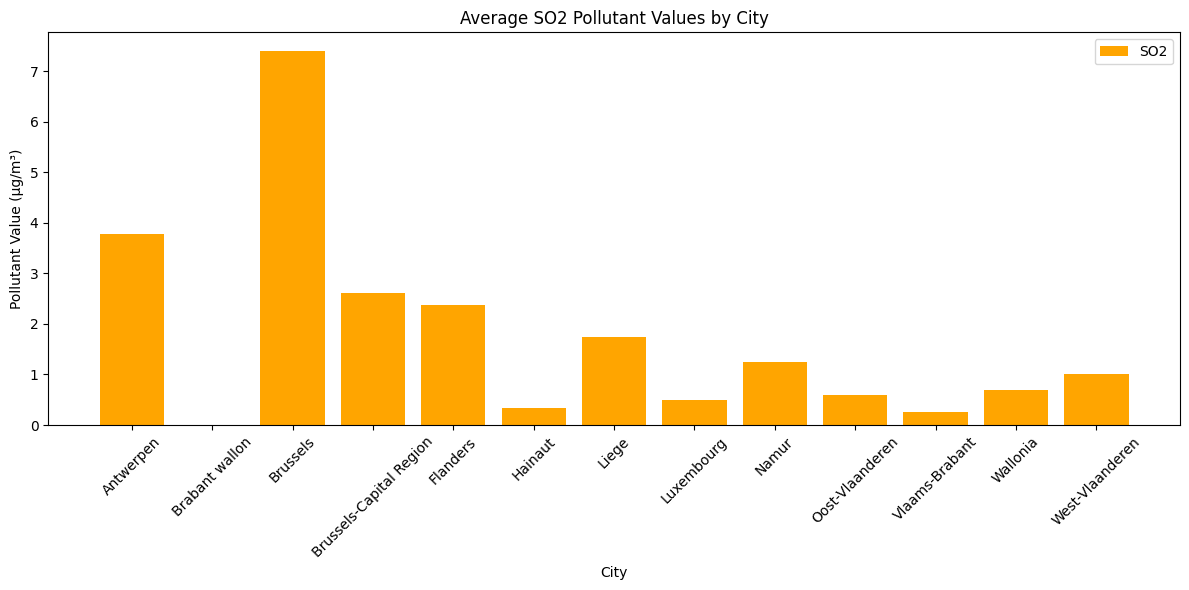

In [7]:
# Filter for SO2 pollutants
so2_df = df[df['Pollutant'] == 'SO2']

# Group by 'City' and aggregate mean values
so2_means = so2_df.groupby('City')['Value'].mean().reset_index()

# Merge the dataframes to ensure both have the same set of cities
merged_df = pd.merge(pm_means, so2_means, on='City', how='inner')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(merged_df['City'], merged_df['Value_y'], color='orange', label='SO2')
plt.xlabel('City')
plt.ylabel('Pollutant Value (\u03BCg/m\u00B3)')
plt.title('Average SO2 Pollutant Values by City')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df_select = df[(df.Pollutant=='CO') & (df.Year==2020) & (df.Value>0)]

In [9]:
df_select.Location.describe()

count                                              20
unique                                             20
top       Belgium - Brussels-Capital Region - BETR001
freq                                                1
Name: Location, dtype: object

In [10]:
# full table
df_select

,City,Location,Coordinates,Pollutant,Value,Last Updated,Latitude,Longitude,Date,Year
18,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETR001,"[50.849667, 4.33382]",CO,0.170,2020-12-20T02:00:00+01:00,50.849667,4.333820,2020-12-20 02:00:00+01:00,2020
19,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETR002,"[50.825127, 4.384719]",CO,0.130,2020-12-20T02:00:00+01:00,50.825127,4.384719,2020-12-20 02:00:00+01:00,2020
87,Luxembourg,Belgium - Luxembourg - BETN085,"[50.303207, 6.001736]",CO,0.140,2020-12-20T02:00:00+01:00,50.303207,6.001736,2020-12-20 02:00:00+01:00,2020
103,Luxembourg,Belgium - Luxembourg - BETN132,"[49.71928, 5.630398]",CO,0.145,2020-12-20T02:00:00+01:00,49.719280,5.630398,2020-12-20 02:00:00+01:00,2020
105,Oost-Vlaanderen,Belgium - Oost-Vlaanderen - BETR701,"[51.05833, 3.729298]",CO,0.185,2020-12-19T02:00:00+01:00,51.058330,3.729298,2020-12-19 02:00:00+01:00,2020
124,Hainaut,Belgium - Hainaut - BETN070,"[50.46519, 3.9397144]",CO,0.160,2020-12-20T02:00:00+01:00,50.465190,3.939714,2020-12-20 02:00:00+01:00,2020
129,Liege,Belgium - Liege - BETR222,"[50.613415, 5.570223]",CO,0.160,2020-12-20T02:00:00+01:00,50.613415,5.570223,2020-12-20 02:00:00+01:00,2020
149,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETB004,"[50.85081, 4.3485875]",CO,0.130,2020-12-20T02:00:00+01:00,50.850810,4.348587,2020-12-20 02:00:00+01:00,2020
155,Hainaut,Belgium - Hainaut - BETR512,"[50.40781, 4.395897]",CO,0.170,2020-12-20T02:00:00+01:00,50.407810,4.395897,2020-12-20 02:00:00+01:00,2020
221,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETB006,"[50.83863, 4.374388]",CO,0.230,2020-12-20T02:00:00+01:00,50.838630,4.374388,2020-12-20 02:00:00+01:00,2020


In [52]:
import folium
from folium.plugins import HeatMap

pm10_df = df[df['Pollutant'] == 'PM10'].copy()

def plot_map(i_df, i_scale):
    zoom_factor = 8
    radius_scaling = i_scale

    # Set data's center point
    my_map = folium.Map(location=[i_df['Latitude'].mean(), i_df['Longitude'].mean()], zoom_start=zoom_factor)

    for i in range(0, i_df.shape[0]):
       folium.CircleMarker(
          location=[i_df.iloc[i]['Latitude'], i_df.iloc[i]['Longitude']],
          radius=np.sqrt(i_df.iloc[i]['Value']) * radius_scaling,
          popup='PM10: ' + str(i_df.iloc[i]['Value']),
          color='blue',
          fill=True,
          fill_color='blue',
          fill_opacity=0.25,
          weight=1
       ).add_to(my_map)

    return my_map

# Implement the color scale
def plot_map_colored(i_df, i_scale):
    zoom_factor = 8
    radius_scaling = i_scale

    my_map = folium.Map(location=[i_df['Latitude'].mean(), i_df['Longitude'].mean()], zoom_start=zoom_factor)

    v_min = np.min(i_df['Value'])
    v_max = np.max(i_df['Value'])

    for i in range(0, i_df.shape[0]):
        v = i_df.iloc[i]['Value']
        v_norm = (v - v_min) / (v_max - v_min)
        i_col = int(v_norm * 256)
        current_color = matplotlib.colors.to_hex(matplotlib.cm.rainbow(i_col))
        folium.CircleMarker(
            location=[i_df.iloc[i]['Latitude'], i_df.iloc[i]['Longitude']],
            radius=np.sqrt(i_df.iloc[i]['Value']) * radius_scaling,
            popup='PM10: ' + str(i_df.iloc[i]['Value']),
            color='black',
            fill=True,
            fill_opacity=0.25,
            fill_color=current_color,
            weight=1
        ).add_to(my_map)

    return my_map

df_select = df[(df.Pollutant=='PM10') & (df.Value>0)]
my_map = plot_map(i_df=df_select, i_scale=3)
my_map

In [54]:
# data filtered for SO2 and assigned to so2_df
so2_df = df[df['Pollutant'] == 'SO2'].copy()

def plot_map(i_df, i_scale):
    zoom_factor = 8
    radius_scaling = i_scale

    # Set data's center point
    my_map = folium.Map(location=[i_df['Latitude'].mean(), i_df['Longitude'].mean()], zoom_start=zoom_factor)

    for i in range(0, i_df.shape[0]):
       folium.CircleMarker(
          location=[i_df.iloc[i]['Latitude'], i_df.iloc[i]['Longitude']],
          radius=np.sqrt(i_df.iloc[i]['Value']) * radius_scaling,
          popup='SO2: ' + str(i_df.iloc[i]['Value']),
          color='orange',
          fill=True,
          fill_color='orange',
          fill_opacity=0.25,
          weight=1
       ).add_to(my_map)

    return my_map

# Implement the color scale
def plot_map_colored(i_df, i_scale):
    zoom_factor = 8
    radius_scaling = i_scale

    my_map = folium.Map(location=[i_df['Latitude'].mean(), i_df['Longitude'].mean()], zoom_start=zoom_factor)

    v_min = np.min(i_df['Value'])
    v_max = np.max(i_df['Value'])

    for i in range(0, i_df.shape[0]):
        v = i_df.iloc[i]['Value']
        v_norm = (v - v_min) / (v_max - v_min)
        i_col = int(v_norm * 256)
        current_color = matplotlib.colors.to_hex(matplotlib.cm.rainbow(i_col))
        folium.CircleMarker(
            location=[i_df.iloc[i]['Latitude'], i_df.iloc[i]['Longitude']],
            radius=np.sqrt(i_df.iloc[i]['Value']) * radius_scaling,
            popup='SO2: ' + str(i_df.iloc[i]['Value']),
            color='black',
            fill=True,
            fill_opacity=0.25,
            fill_color=current_color,
            weight=1
        ).add_to(my_map)

    return my_map

df_select = df[(df.Pollutant=='SO2') & (df.Value>0)]
my_map = plot_map(i_df=df_select, i_scale=3)
my_map